In [1]:
import keras
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Activation,Dense,Dropout,Conv2D,Flatten,MaxPooling2D,BatchNormalization
from keras.datasets import cifar10
from keras import optimizers
from matplotlib import pyplot as plt

In [2]:
#generate cifar10 data
(x_train,y_train),(x_test,y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 13s 0us/step


In [3]:
#config parameters
num_classes = 10
input_shape = x_train.shape[1:4]
optimizer = optimizers.Adam(lr=0.001)

In [4]:
#convert label to one-hot
one_hot_y_train = keras.utils.to_categorical(y_train,num_classes=num_classes)
one_hot_y_test = keras.utils.to_categorical(y_test,num_classes=num_classes)

(32, 32, 3)


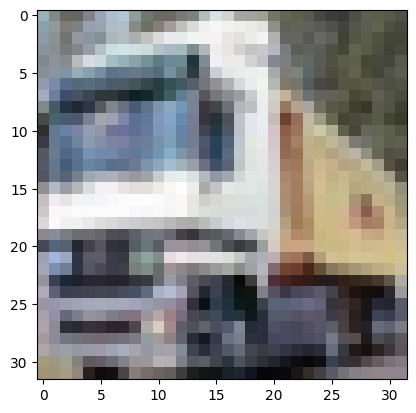

In [5]:
# check data
plt.imshow(x_train[1])
print(x_train[1].shape)

In [6]:

# build model(similar to VGG16, only change the input and output shape)
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [7]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [9]:
history = model.fit(x=x_train, y=one_hot_y_train, batch_size=128, epochs=30, validation_split=0.1)

Epoch 1/30
352/352 [==============================] - 48s 90ms/step - loss: 1.8169 - accuracy: 0.3191 - val_loss: 2.2561 - val_accuracy: 0.3868
Epoch 2/30
352/352 [==============================] - 29s 82ms/step - loss: 1.3193 - accuracy: 0.5236 - val_loss: 1.9344 - val_accuracy: 0.4768
Epoch 3/30
352/352 [==============================] - 29s 83ms/step - loss: 1.0884 - accuracy: 0.6251 - val_loss: 1.2970 - val_accuracy: 0.6314
Epoch 4/30
352/352 [==============================] - 29s 81ms/step - loss: 0.8810 - accuracy: 0.7045 - val_loss: 0.9075 - val_accuracy: 0.7140
Epoch 5/30
352/352 [==============================] - 29s 81ms/step - loss: 0.7388 - accuracy: 0.7558 - val_loss: 0.9402 - val_accuracy: 0.7148
Epoch 6/30
352/352 [==============================] - 28s 79ms/step - loss: 0.6497 - accuracy: 0.7877 - val_loss: 0.8723 - val_accuracy: 0.7382
Epoch 7/30
352/352 [==============================] - 28s 81ms/step - loss: 0.5846 - accuracy: 0.8111 - val_loss: 1.0565 - val_accuracy:

In [10]:
# evaluate
print(model.metrics_names)
model.evaluate(x=x_test,y=one_hot_y_test,batch_size=512)

['loss', 'accuracy']
20/20 [==============================] - 7s 171ms/step - loss: 0.7479 - accuracy: 0.8426


[0.7478859424591064, 0.8425999879837036]

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 932ms/step
predict class: 5
expected class: 5


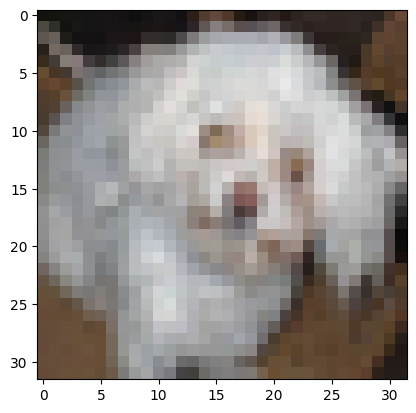

In [11]:
model.save("keras-VGG16-cifar10.h5")
plt.imshow(x_test[1000])

result = model.predict(x_test[1000:1001]).tolist()
predict = 0
expect = y_test[1000][0]
for i,_ in enumerate(result[0]):
   if result[0][i] > result[0][predict]:
    predict = i
print("predict class:",predict)
print("expected class:",expect)

In [12]:
# save model
model.save("keras-VGG16-cifar10.h5")

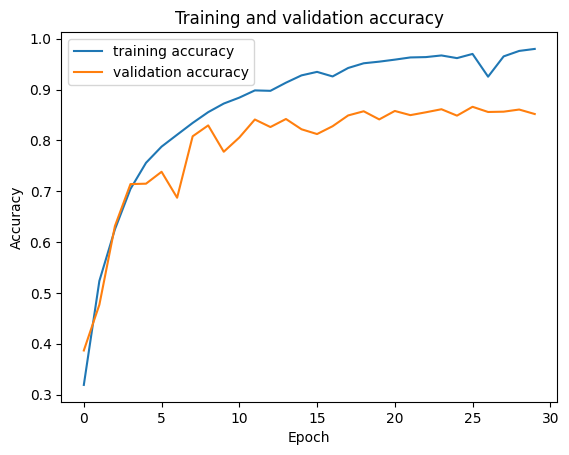

In [13]:
#plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



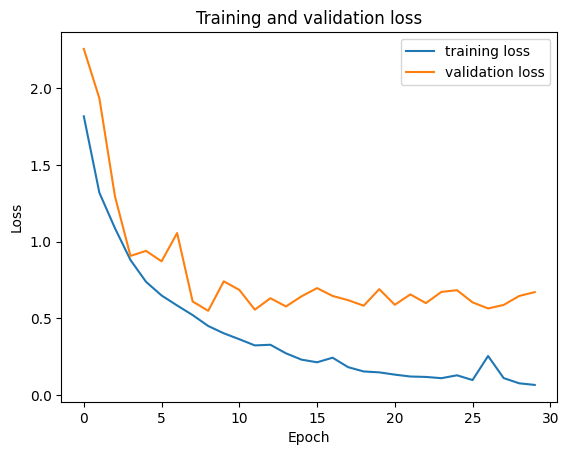

In [14]:
#plot the training and validation loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 4s 10ms/step


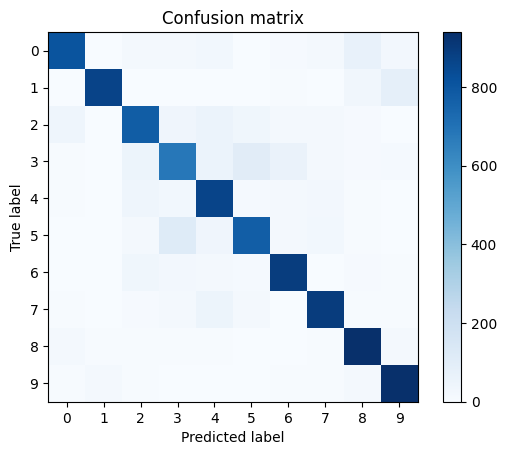

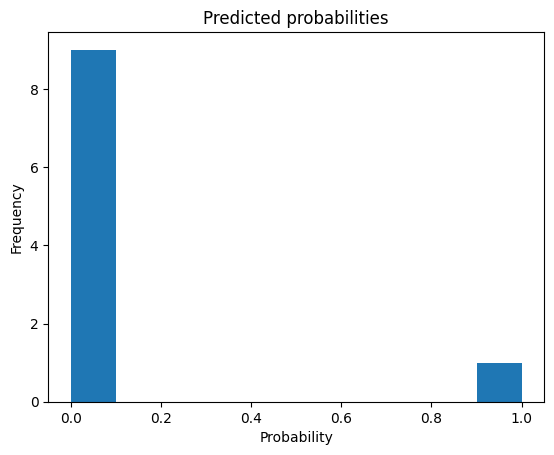

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.ravel()
cm = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# plot a histogram of the predicted probabilities for a sample image
plt.hist(y_pred[1000])
plt.title('Predicted probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()
